## Deep Learning Applied to Images - Fine-tuning

#### Prof. Thomas da Silva Paula

### Using fine-tuned model for inference

* Using Keras
* Using MobileNet trained on subset of the natural images dataset (https://www.kaggle.com/prasunroy/natural-images)

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.preprocessing import image

### Creating the model

In [2]:
alpha = 0.25
dropout = 1e-3
num_classes = 8
shape = (1, 1, int(1024 * alpha))

base_model = MobileNet(alpha=alpha, weights='imagenet', include_top=False, pooling='avg')
x = base_model.output
x = Reshape(shape, name='reshape_1')(x)
x = Dropout(dropout, name='dropout')(x)
x = Conv2D(num_classes, (1, 1),
                  padding='same',
                  name='conv_preds')(x)
x = Reshape((num_classes,), name='reshape_2')(x)
predictions = Activation('softmax', name='preds')(x)

new_model = Model(inputs=base_model.input, outputs=predictions)

In [3]:
new_model.load_weights('mobilenet_natural_images_weights.h5')

In [4]:
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Testing predictions

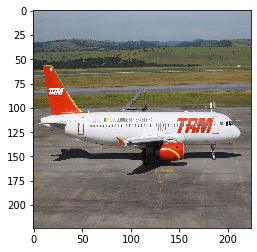

In [5]:
img_path = 'sample_images/airplane.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

In [6]:
img = image.img_to_array(img)
img = preprocess_input(img)

print(img.shape)

(224, 224, 3)


In [7]:
preds = new_model.predict(np.expand_dims(img, axis=0))
print(preds)

[[9.7080380e-01 1.8977944e-02 1.0478457e-04 7.7929832e-03 6.8983855e-04
  5.3200623e-05 1.1636126e-03 4.1388319e-04]]


In [8]:
classes = ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

<BarContainer object of 8 artists>

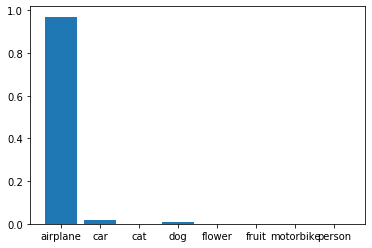

In [9]:
plt.bar(np.arange(0, len(preds[0])), preds[0], tick_label=classes)